In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
try:
    df = pd.read_csv('/content/drive/MyDrive/breast_cancer.csv')
    print("Dataset loaded successfully.")
    display(df.head())
except FileNotFoundError:
    print("Error: breast_cancer.csv not found. Please check the file path.")
    df = None # Set df to None to avoid errors later

Dataset loaded successfully.


,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
if df is not None:
    # Separate features (X) and label (y)
    # Assuming 'label' is the target column and 'Unnamed: 0' is an index column to be dropped
    X = df.drop(['label', 'Unnamed: 0'], axis=1)
    y = df['label']

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # One-hot encode the labels
    Y = pd.get_dummies(y).values

    print("\nData preparation complete.")
    print("Shape of scaled features (X_scaled):", X_scaled.shape)
    print("Shape of one-hot encoded labels (Y):", Y.shape)
else:
    print("DataFrame is not loaded. Skipping data preparation.")


Data preparation complete.
Shape of scaled features (X_scaled): (569, 30)
Shape of one-hot encoded labels (Y): (569, 2)


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, Input

if 'X_scaled' in locals() and 'Y' in locals():
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

    # Build the neural network model
    model = models.Sequential([
        Input(shape=(X_train.shape[1],)),  # Use Input layer for specifying input shape
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(32, activation="relu"),
        layers.Dense(Y.shape[1], activation="softmax")   # Adjust to the number of classes
    ])

    # Compile the model
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",   # Use categorical_crossentropy for one-hot encoded labels
        metrics=["accuracy"]
    )

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=16,
        verbose=1
    )

    print("\nModel training complete.")
else:
    print("Scaled features (X_scaled) or one-hot encoded labels (Y) not found. Skipping model training.")

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7340 - loss: 0.5323 - val_accuracy: 0.9780 - val_loss: 0.1786
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9675 - loss: 0.1757 - val_accuracy: 1.0000 - val_loss: 0.1064
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9620 - loss: 0.1246 - val_accuracy: 0.9890 - val_loss: 0.0795
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9775 - loss: 0.1031 - val_accuracy: 0.9890 - val_loss: 0.0648
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9749 - loss: 0.0847 - val_accuracy: 0.9890 - val_loss: 0.0574
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9871 - loss: 0.0715 - val_accuracy: 0.9890 - val_loss: 0.0529
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9706 - loss: 0.0761 - val_accuracy: 0.9890 - val_loss: 0.0479
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9858 - loss: 0.0551 - val_accuracy: 0.9890 - val

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        47
           1       0.98      0.97      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
[[46  1]
 [ 2 65]]


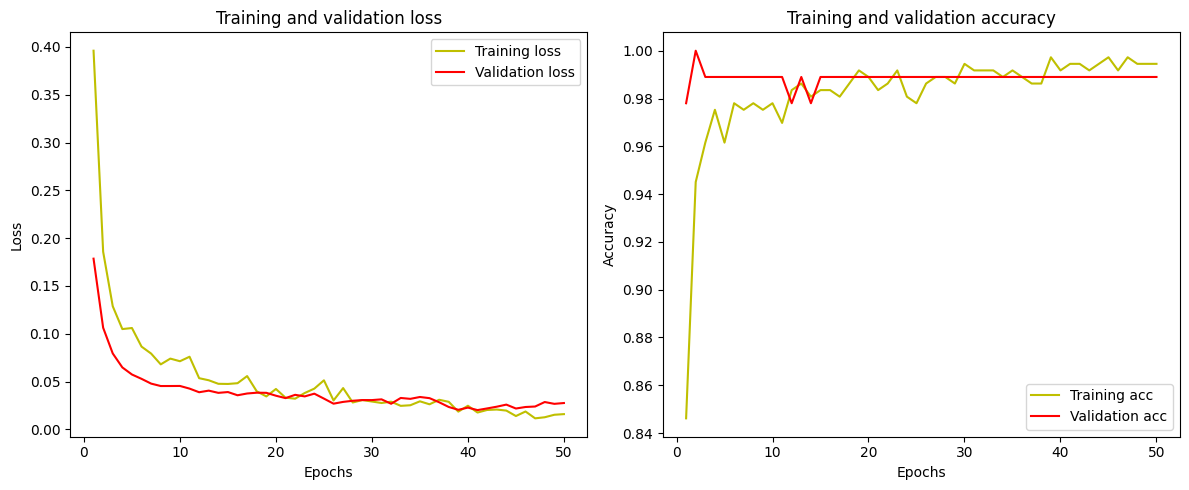

In [4]:
if 'model' in locals() and 'X_test' in locals() and 'y_test' in locals():
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Convert predictions and true labels back to class indices for evaluation
    y_test_class = np.argmax(y_test, axis=1)
    y_pred_class = np.argmax(y_pred, axis=1)

    # Evaluate the model
    from sklearn.metrics import classification_report, confusion_matrix
    print("\nClassification Report:")
    print(classification_report(y_test_class, y_pred_class))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test_class, y_pred_class))

    # Plot training and validation history
    import matplotlib.pyplot as plt
    import seaborn as sns

    if 'history' in locals():
        # Plot training & validation loss values
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(1, len(loss) + 1)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(epochs, loss, 'y', label='Training loss')
        plt.plot(epochs, val_loss, 'r', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Plot training & validation accuracy values
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']

        plt.subplot(1, 2, 2)
        plt.plot(epochs, acc, 'y', label='Training acc')
        plt.plot(epochs, val_acc, 'r', label='Validation acc')
        plt.title('Training and validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()
    else:
        print("\nTraining history not found. Skipping plots.")
else:
    print("\nModel, test data, or test labels not found. Skipping evaluation and plotting.")